In [2]:
import numpy as np
import matplotlib.pyplot as plt


takens = np.empty((1000,2))

with open("takens_1.txt") as f:
    line = f.readline()
    cnt = 0
    while line:
        x01, x02 = str(line).split(" ")
        takens[cnt, 0] = float(x01)
        takens[cnt, 1] = float(x02)
        cnt = cnt + 1
        line = f.readline()

In [3]:
takens

array([[ 2.16837096, -0.54631259],
       [ 2.17981061, -0.53247518],
       [ 2.19002807, -0.51894034],
       ...,
       [ 2.14086777, -0.5761134 ],
       [ 2.15555144, -0.56069056],
       [ 2.16853679, -0.54611965]])

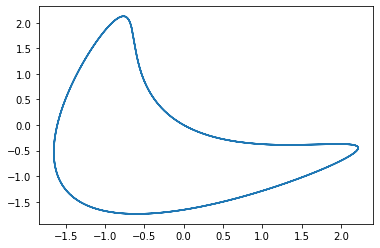

In [4]:
plt.plot(takens[:,0], takens[:,1])
plt.show()

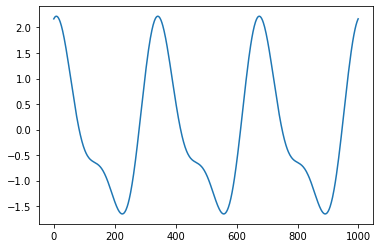

In [8]:
t=range(0,1000)
plt.plot(t,takens[:,0])

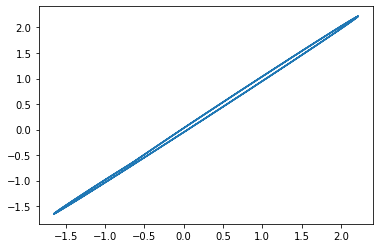

In [67]:
def shift1(x):
    xfirst=np.array(x[0])
    xleft=x[1:]
    return np.append(xleft,xfirst)


def shiftt(x,t):
    xfirst=x[0:t]
    xleft=x[t:]
    return np.append(xleft,xfirst)


x0=takens[:,0]

x1=shift1(x0)
plt.plot(x1,x0)


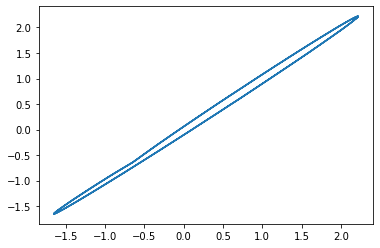

In [55]:
x2=shift1(x1)
plt.plot(x2,x0)

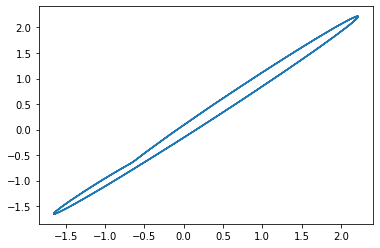

In [56]:
x3=shift1(x2)
plt.plot(x3,x0)

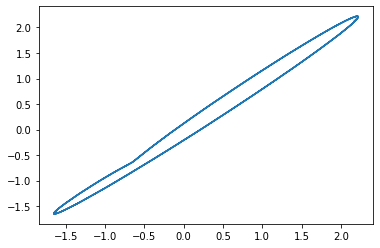

In [57]:
x4=shift1(x3)
plt.plot(x4,x0)

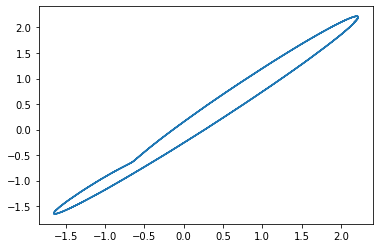

In [58]:
x5=shift1(x4)
plt.plot(x5,x0)

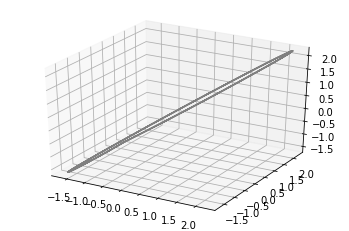

In [61]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x0, x1, x2, 'gray')

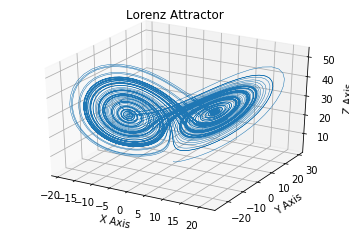

In [62]:
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()




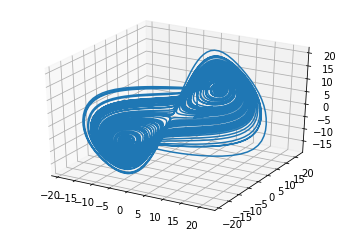

In [68]:
xs1=shiftt(xs,10)
xs2=shiftt(xs1,10)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(xs,xs1,xs2)
plt.show()

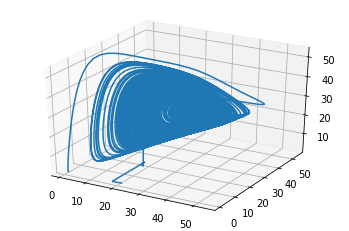

In [69]:
zs1=shiftt(zs,10)
zs2=shiftt(zs1,10)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(zs,zs1,zs2)
plt.show()

In [70]:
coors = np.empty((3751,2))

with open("ex5_task4.csv") as f:
    line = f.readline()
    cnt = 0
    while line:
        x01, x02 = str(line).split(",")
        coors[cnt, 0] = float(x01)
        coors[cnt, 1] = float(x02)
        cnt = cnt + 1
        line = f.readline()

In [71]:
coors

array([[15.06468769,  1.42493893],
       [14.43596484,  1.25332572],
       [14.43596484,  1.25332572],
       ...,
       [20.16310249,  2.09748893],
       [19.85130372,  1.96220887],
       [19.36981911,  1.97002193]])

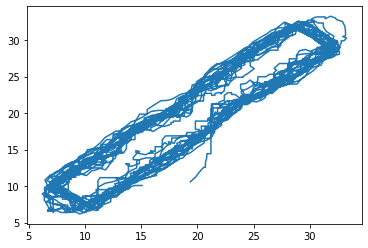

In [77]:
cox=coors[:,0]
cox1=shiftt(cox,10)
plt.plot(cox, cox1)

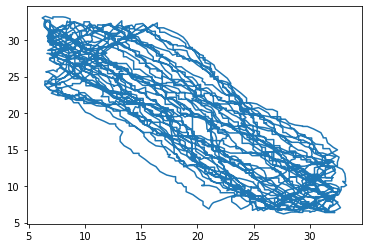

In [78]:
cox2=shiftt(cox,100)
plt.plot(cox,cox2)

In [79]:
P=np.empty((3500,200))
for i in range(3500):
    for j in range(200):
        P[i][j]=cox[i+j]

In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(P)

PC=pca.components_
print(PC)

[[-0.08542609 -0.08685664 -0.08817897 -0.08939488 -0.09050067 -0.09149438
  -0.09237231 -0.09313791 -0.09378224 -0.09430464 -0.09470492 -0.09498459
  -0.09514125 -0.09517631 -0.09508878 -0.09487848 -0.09454735 -0.09409583
  -0.09352297 -0.09282853 -0.09201622 -0.09108418 -0.09003371 -0.08886696
  -0.08758537 -0.08619203 -0.08468907 -0.08307536 -0.08135316 -0.07952389
  -0.07759457 -0.07556649 -0.07344317 -0.07122586 -0.0689175  -0.06652259
  -0.06404277 -0.06148109 -0.05884198 -0.05612922 -0.0533438  -0.05049227
  -0.04757877 -0.04460852 -0.04158222 -0.03850498 -0.03537989 -0.03220911
  -0.02899531 -0.02574535 -0.02246117 -0.01914578 -0.01580729 -0.01245013
  -0.00907812 -0.00569475 -0.00230101  0.00109806  0.00449674  0.00789372
   0.01128252  0.01466027  0.01802149  0.02136089  0.02467654  0.02796361
   0.03121718  0.03443586  0.03761243  0.04074447  0.04382626  0.04685436
   0.04982467  0.05273345  0.05557701  0.05835225  0.06105354  0.0636782
   0.06622336  0.06868743  0.07106562  

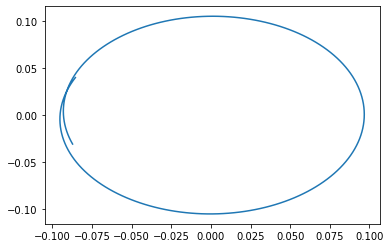

In [92]:
plt.plot(PC[0,:],PC[1,:])